In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn import neighbors
from sklearn import linear_model
%matplotlib inline

In [2]:
nfl_players = pd.read_csv('Basic_Stats.csv')
nfl_players
nfl_players.Position.unique()

array([nan, 'DE', 'TE', 'SS', 'DB', 'OT', 'CB', 'G', 'OG', 'C', 'QB',
       'FB', 'MLB', 'FS', 'DT', 'WR', 'OLB', 'T', 'LB', 'RB', 'ILB', 'K',
       'NT', 'LS', 'P', 'SAF', 'DL', 'OL'], dtype=object)

In [3]:
player_stats = pd.DataFrame()
player_stats['Position'] = nfl_players['Position'].dropna()
player_stats['Height']=nfl_players['Height (inches)']
player_stats['Weight']=nfl_players['Weight (lbs)']
player_stats['Lineman'] = np.where((player_stats['Position'].isin(['DE', 'OT','G','C','OG','T','DT','NT'])), 1, 0)

In [4]:
player_stats

,Position,Height,Weight,Lineman
4,DE,77.0,305.0,1
7,TE,77.0,250.0,0
17,TE,74.0,220.0,0
35,SS,71.0,200.0,0
37,SS,72.0,205.0,0
39,DB,72.0,210.0,0
45,OT,75.0,295.0,1
52,CB,74.0,190.0,0
54,OT,76.0,331.0,1
63,CB,74.0,208.0,0


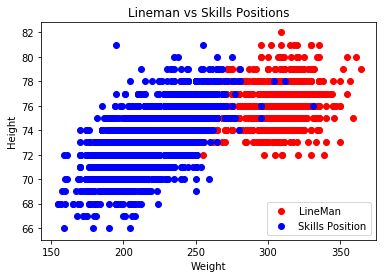

In [5]:
plt.scatter(
    player_stats[player_stats['Lineman'] == 1].Weight,
    player_stats[player_stats['Lineman'] == 1].Height,
    color='red'
)
plt.scatter(
    player_stats[player_stats['Lineman'] == 0].Weight,
    player_stats[player_stats['Lineman'] == 0].Height,
    color='blue'
)
plt.legend(['LineMan', 'Skills Position'])
plt.title('Lineman vs Skills Positions')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

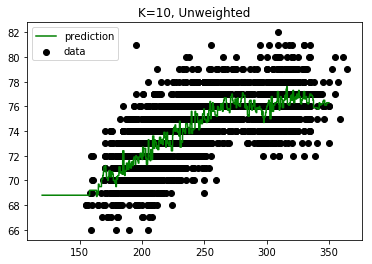

In [6]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(player_stats.Weight)
Y = player_stats.Height
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(120, 350, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

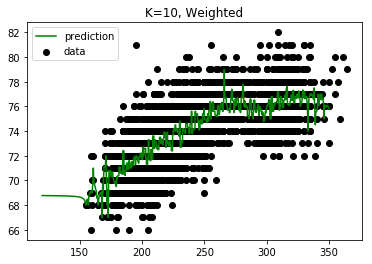

In [7]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(player_stats.Weight)
Y = player_stats.Height
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(120, 350, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [8]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.50 (+/- 0.05)
Weighted Accuracy: 0.49 (+/- 0.04)


Coefficients: 
 [0.04022143]
Intercept: 
 64.26296483493503


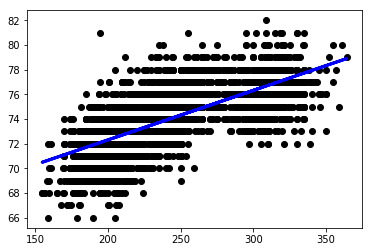

In [9]:
regr = linear_model.LinearRegression()
x = pd.DataFrame(player_stats.Weight)
y = player_stats.Height

regr.fit(x, y)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

plt.scatter(x, y, color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.show()

I think that the liner regression does a better job of predicting the weight of a player than the neighboors. Because of how the players weight is distributed in such a strange fashion. 